## 赛题背景

本次新人赛是Datawhale与天池联合发起的零基础入门系列赛事第二场 —— 零基础入门CV赛事之街景字符识别。

赛题以计算机视觉中字符识别为背景，要求选手预测真实场景下的字符识别，这是一个典型的字符识别问题。通过这道赛题可以引导大家走入计算机视觉的世界，主要针对竞赛选手上手视觉赛题，提高对数据建模能力。


## 赛题数据

赛题来源自Google街景图像中的门牌号数据集（The Street View House Numbers Dataset, SVHN），并根据一定方式采样得到比赛数据集。
该数据来自真实场景的门牌号。训练集数据包括3W张照片，验证集数据包括1W张照片，每张照片包括颜色图像和对应的编码类别和具体位置；为了保证比赛的公平性，测试集A包括4W张照片，测试集B包括4W张照片。

样图如下：

![Image of Data](https://tianchi-public.oss-cn-hangzhou.aliyuncs.com/public/files/forum/158945019331318501589450193025.jpeg)

### 字段表
所有的数据（训练集、验证集和测试集）的标注使用JSON格式，并使用文件名进行索引。如果一个文件中包括多个字符，则使用列表将字段进行组合。

对于训练数据每张图片将给出对于的编码标签，和具体的字符框的位置（训练集、测试集和验证集都给出字符位置），可用于模型训练：

| Field  | Description|
|--------- | --------|
| top	| 左上角坐标X |
| height	| 字符高度 |
| left   | 左上角最表Y |
| width  | 字符宽度 |
| label  | 字符编码 |


字符的坐标具体如下所示：
![img of char](https://github.com/datawhalechina/team-learning/raw/master/03%20%E8%AE%A1%E7%AE%97%E6%9C%BA%E8%A7%86%E8%A7%89/%E8%AE%A1%E7%AE%97%E6%9C%BA%E8%A7%86%E8%A7%89%E5%AE%9E%E8%B7%B5%EF%BC%88%E8%A1%97%E6%99%AF%E5%AD%97%E7%AC%A6%E7%BC%96%E7%A0%81%E8%AF%86%E5%88%AB%EF%BC%89/IMG/Task01/%E5%AD%97%E7%AC%A6%E5%9D%90%E6%A0%87.png)

## 赛题报名及数据下载

报名后可下载数据，一共五个文件，2个json文件，3个数据集的zip文件。分别为train.json, val.json, train.zip, val.zip, test_a.zip
train为训练集，用于训练模型；val为验证集，用于验证模型的效果；而test_a为最终测试集。测试集B在线上用于最终比赛评估，并未提供。

## 查看数据

In [ ]:
# 导入所需库
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取json
train_json = json.load(open('./mchar_train.json'))

# 数据标注处理函数
def parse_json(d):
    # 提取json中标签所在图片的位置及编号
   arr = np.array([
       d['top'], d['height'], d['left'],  d['width'], d['label']])
   arr = arr.astype(int) # 把位置和编号从String转化为Int
   return arr

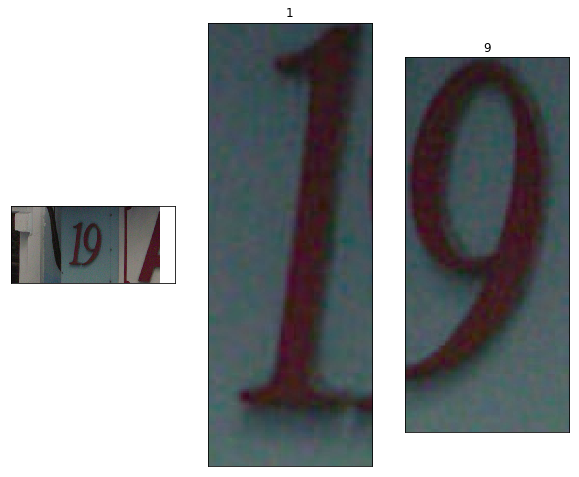

In [13]:
# 读取图片和标签
img = cv2.imread('./mchar_train/mchar_train/000000.png')
arr = parse_json(train_json['000000.png'])

# 画图
plt.figure(figsize=(10, 10))
plt.subplot(1, arr.shape[1]+1, 1)
plt.imshow(img)
plt.xticks([]); plt.yticks([]);

for idx in range(arr.shape[1]):
   plt.subplot(1, arr.shape[1]+1, idx+2)
   plt.imshow(img[arr[0, idx]:arr[0, idx]+arr[1, idx],arr[2, idx]:arr[2, idx]+arr[3, idx]])
   plt.title(arr[4, idx])
   plt.xticks([]); plt.yticks([])

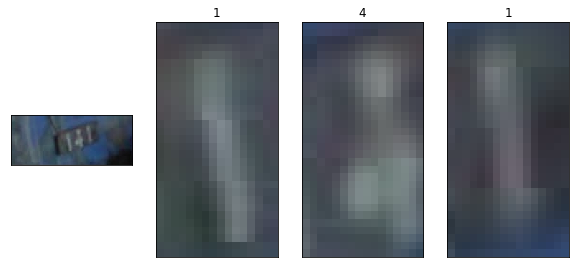

In [15]:
# 读取图片和标签
img = cv2.imread('./mchar_train/mchar_train/001001.png')
arr = parse_json(train_json['001001.png'])

# 画图
plt.figure(figsize=(10, 10))
plt.subplot(1, arr.shape[1]+1, 1)
plt.imshow(img)
plt.xticks([]); plt.yticks([]);

for idx in range(arr.shape[1]):
   plt.subplot(1, arr.shape[1]+1, idx+2)
   plt.imshow(img[arr[0, idx]:arr[0, idx]+arr[1, idx],arr[2, idx]:arr[2, idx]+arr[3, idx]])
   plt.title(arr[4, idx])
   plt.xticks([]); plt.yticks([])

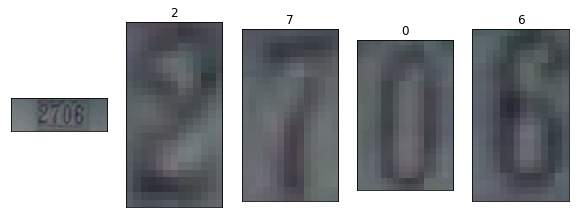

In [16]:
# 读取图片和标签
img = cv2.imread('./mchar_train/mchar_train/005001.png')
arr = parse_json(train_json['005001.png'])

# 画图
plt.figure(figsize=(10, 10))
plt.subplot(1, arr.shape[1]+1, 1)
plt.imshow(img)
plt.xticks([]); plt.yticks([]);

for idx in range(arr.shape[1]):
   plt.subplot(1, arr.shape[1]+1, idx+2)
   plt.imshow(img[arr[0, idx]:arr[0, idx]+arr[1, idx],arr[2, idx]:arr[2, idx]+arr[3, idx]])
   plt.title(arr[4, idx])
   plt.xticks([]); plt.yticks([])

从以上3个数据中可看出，数据标签的长度不固定，数据的清晰度也有不同

## 解题思路

赛题思路分析：赛题本质是分类问题，需要对图片的字符进行识别。但赛题给定的数据图片中不同图片中包含的字符数量不等，如下图所示。有的图片的字符个数为2，有的图片字符个数为3，有的图片字符个数为4。

Datawhale提供了三种不同的解题思路：

1. 简单入门思路：定长字符识别
可以将赛题抽象为一个定长字符识别问题，在赛题数据集中大部分图像中字符个数为2-4个，最多的字符 个数为6个。
因此可以对于所有的图像都抽象为6个字符的识别问题，字符23填充为23XXXX，字符231填充为231XXX。
经过填充之后，原始的赛题可以简化了6个字符的分类问题。在每个字符的分类中会进行11个类别的分类，假如分类为填充字符，则表明该字符为空。

2. 专业字符识别思路：不定长字符识别
在字符识别研究中，有特定的方法来解决此种不定长的字符识别问题，比较典型的有CRNN字符识别模型。
在本次赛题中给定的图像数据都比较规整，可以视为一个单词或者一个句子。

3. 专业分类思路：检测再识别
在赛题数据中已经给出了训练集、验证集中所有图片中字符的位置，因此可以首先将字符的位置进行识别，利用物体检测的思路完成。
此种思路需要参赛选手构建字符检测模型，对测试集中的字符进行识别。选手可以参考物体检测模型SSD或者YOLO来完成。

## 评测标准
评价标准为准确率，选手提交结果与实际图片的编码进行对比，以编码整体识别准确率为评价指标，结果越大越好，具体计算公式如下：

![公式.png](img/公式.png)
